<a href="https://colab.research.google.com/github/MiguelAngel-ht/Quantum-Computing/blob/main/Deutsch_Jozsa_Algorithm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deutsch–Jozsa algorithm**

**The Deutsch–Jozsa algorithm** **is a deterministic** (same input have same output)**quantum algorithm** proposed by David Deutsch and Richard Jozsa in 1992. Although of little current practical use, it is one of the first examples of **a quantum algorithm that is exponentially faster than** any possible deterministic **classical algorithm**.

Consider a function $f$ that takes as input $n$-bit strings $x$ and returns 0 or 1.

${\displaystyle f\colon \{0,1\}^{n}\rightarrow \{0,1\}}$

The function takes $n$-bit binary values as input and produces either a 0 or a 1 as output for each such value. We are promised that **the function is** either **constant** (0 or 1 on all inputs) **or balanced** (half 0 and half 1). The task then is to determine if ${\displaystyle f}$ is constant or balanced by using *the oracle*.

### **Import Libraries**

In [1]:
from google.colab import output     # clear output when is not necessary

In [2]:
!pip install qiskit                   
!pip install qiskit[visualization]   # Qiskit to parameter "mpl" works
# Import qiskit_textbook.widgets 
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
output.clear()

In [3]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
from qiskit_textbook.widgets import dj_widget

# import basic plot tools
from qiskit.visualization import plot_histogram

# **ALGORITHM**

The generic circuit for the Deutsch-Jozsa algorithm.

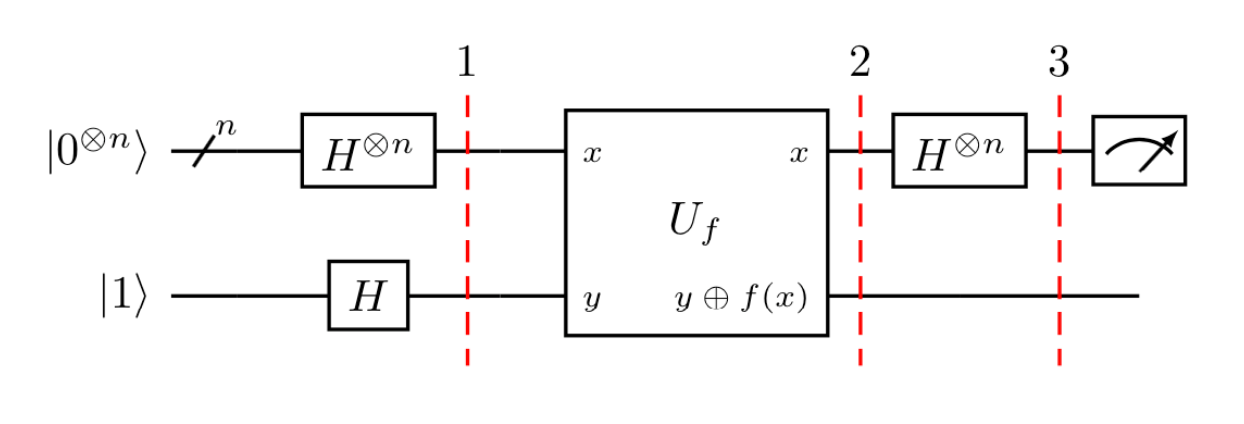

Steps of Algorithm:

1.- Prepare two quantum registers. The first is an $n$-qubit register initialized to $|0⟩$, and the second is a one-qubit register initialized to $|1⟩$:

$|ψ_0⟩=|0⟩^{⊗n}|1⟩$

2.- Apply a Hadamard gate to each qubit:

$|ψ1⟩=\frac{1}{\sqrt{2^{n+1}}} \sum_{x=0}^{2^n-1} |x\rangle (|0\rangle - |1\rangle)$

3.- Apply the quantum oracle $|x\rangle |y\rangle:$ to $|x\rangle |y \otimes f(x) \rangle:$

$|\psi_2\rangle = \frac{1}{\sqrt{2^{n+1}}} \sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle) (|0\rangle - |1\rangle)$

4.- At this point the second single qubit register may be ignored. Apply a Hadamard gate to each qubit in the first register:

$|\psi_3\rangle = \frac{1}{2^n} \sum_{y=0}^{2^n-1} \left[\sum_{x=0}^{2^n-1} (-1)^{f(x)}(-1)^{x \cdot y}  \right]$

where $x \cdot y = x_0 y_0 \oplus x_1 y_1 \oplus ...\oplus x_{n-1}y_{n-1}$

5.- Measure the first register. Notice that the probability of measuring $|0\rangle ^{\otimes n} = \left| \frac{1}{2^n} \sum_{x=0}^{2^n -1} (-1)^{f(x)} \right|^2$ , which evaluates to 1 if $f(x)$ is constant and 0 if $f(x)$ is balanced.



In [9]:
def add_not_gates(b_str, oracle_qc):
  for qubit in range(len(b_str)):
    if b_str[qubit] == '1':     # IF Qbit is 1 add NOT gate, in 0 nothing
      oracle_qc.x(qubit)

def dj_oracle(case, n):
    oracle_qc = QuantumCircuit(n + 1)     # Create quantum circuit
    # Case balanced
    if case in ["balanced", "b", "bal"]:
        b = np.random.randint(1, 2 ** n)
        b_str = format(b, '0' + str(n) + 'b')

        add_not_gates(b_str, oracle_qc)
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        add_not_gates(b_str, oracle_qc)

    # Case constant
    if case in ["constant", "c", "const"]:
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    else:
      print('The case is not well writed')
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"         # Title of the circuit
    return oracle_gate

In [11]:
def add_hadamard_gates(n, dj_circuit):
  for qubit in range(n):
    dj_circuit.h(qubit)     # add n hadamard gates

def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    dj_circuit.x(n)
    dj_circuit.h(n)

    add_hadamard_gates(n, dj_circuit)
    dj_circuit.append(oracle, range(n+1))
    add_hadamard_gates(n, dj_circuit)

    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

The case is not well writed


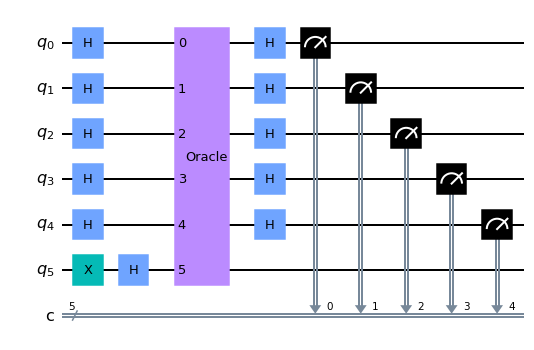

In [13]:
n = 5   # number of qbits

oracle_gate = dj_oracle('balanced', n)      
dj_circuit = dj_algorithm(oracle_gate, n)

dj_circuit.draw('mpl')

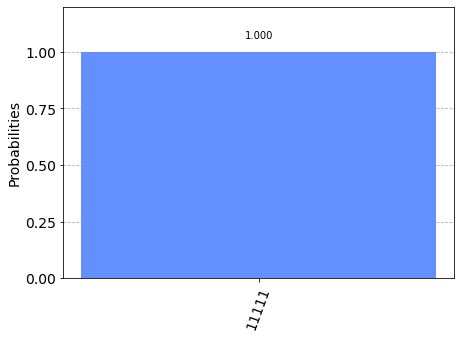

In [14]:
aer_sim = Aer.get_backend('aer_simulator')   # use local simulator
transpiled_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(transpiled_dj_circuit)      # best compiler

results = aer_sim.run(qobj).result()    # simulation
answer = results.get_counts()     # obtaining counts of the simulation

plot_histogram(answer)  

## **REFERENCE**

Code from [Qiskit Textbook](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html#1.4-Why-Does-This-Work?--). Click on it.